# EDA Analysis

In [2]:
# Data processing
# -----------------------------------------------------------------------
import pandas as pd

# Visualization
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # allows you to see the complete columns


In [3]:
# Load the data from the .csv files and store them in a variable for each one.

df_flight = pd.read_csv("../data/customer_flight_activity.csv")
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
df_loyalty = pd.read_csv("../data/customer_loyalty_history.csv")
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [5]:
# list with both dataframes so that we can iterate through them later.

list_df = [df_flight, df_loyalty]

In [18]:
# Initial scan of the data for each dataframe

for df, name in zip(list_df, ["Customer Flight Activity", "Customer Loyalty History"]):
    print(f"{name}:")
    print("___________________________________________________________")
    df.info()
    print("___________________________________________________________")
    print(df.describe().T)
    print("___________________________________________________________")
    print(f"The number of rows is {df.shape[0]} and of columns is {df.shape[1]}")
    print("___________________________________________________________")

    # This try/except block is in case it does not find any categorical column that does not fail.
    try:
        print(df.describe(include="object").T) 
    except ValueError as e:
        print("There are no categorical columns in this DataFrame.")
    
    print("___________________________________________________________")

Customer Flight Activity:
___________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
____________________________________________

In [19]:
# See the name of the columns. 
# The loyalty number is the common column between both dataframes

for df, name in zip(list_df, ["Customer Flight Activity", "Customer Loyalty History"]):
    print(f"{name} Columns:")
    print("___________________________________________________________")
    print(df.columns)
    print("___________________________________________________________")

Customer Flight Activity Columns:
___________________________________________________________
Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')
___________________________________________________________
Customer Loyalty History Columns:
___________________________________________________________
Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')
___________________________________________________________


In [21]:
# Look at the unique values of each column to see if there are any unusual things.

for df, name in zip(list_df, ["Customer Flight Activity", "Customer Loyalty History"]):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Unique Values ({len(unique_values)}): {unique_values}")
        print("___________________________________________________________")

Column: Loyalty Number
Unique Values (16737): [100018 100102 100140 ... 999731 999788 999891]
___________________________________________________________
Column: Year
Unique Values (2): [2017 2018]
___________________________________________________________
Column: Month
Unique Values (12): [ 1  9  2  3 11  4  5  7  6  8 10 12]
___________________________________________________________
Column: Flights Booked
Unique Values (22): [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]
___________________________________________________________
Column: Flights with Companions
Unique Values (12): [ 0  4  7  1  6  3  5  2 10  8  9 11]
___________________________________________________________
Column: Total Flights
Unique Values (33): [ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]
___________________________________________________________
Column: Distance
Unique Values (4746): [1521 2030 1200 ... 1217  617 4135]
__________

In [24]:
# Locate if there are null values

for df, name in zip(list_df, ["Customer Flight Activity", "Customer Loyalty History"]):
    print(f"{name}:")
    print("___________________________________________________________")
    print(df.isnull().sum())
    print("___________________________________________________________")
    print(f"{name} has a total of {df.isnull().sum().sum()} null values")
    print("___________________________________________________________")

Customer Flight Activity:
___________________________________________________________
Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64
___________________________________________________________
Customer Flight Activity has a total of 0 null values
___________________________________________________________
Customer Loyalty History:
___________________________________________________________
Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enr

In [12]:
# Locate if there are duplicated values

for df, name in zip(list_df, ["Customer Flight Activity", "Customer Loyalty History"]):
    print(f"{name} has a total of {df.duplicated().sum()} duplicated values")
    print("___________________________________________________________")

Customer Flight Activity has a total of 1864 duplicated values
___________________________________________________________
Customer Loyalty History has a total of 0 duplicated values
___________________________________________________________


In [13]:
# Each duplicate corresponds to the travel activity of a passenger with that number.

duplicate_counts = df_flight['Loyalty Number'].value_counts()
print("Duplicates in Customer Flight Activity:")
duplicate_counts

Duplicates in Customer Flight Activity:


Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64

In [14]:
# I take a sample of a Loyalty Number to see exactly what it is.
# We can see that it is the same passenger with that number and his flights in different months.

df_flight[df_flight["Loyalty Number"] == 100140].head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
2,100140,2017,1,6,0,6,1200,120.0,0,0
16903,100140,2017,2,0,0,0,0,0.0,0,0
33804,100140,2017,3,3,2,5,3690,369.0,0,0
50705,100140,2017,4,12,0,12,1044,104.0,0,0
67606,100140,2017,5,4,4,8,3592,359.0,0,0


In [27]:
# I turn the Loyalty Number back to the index so that it does not interfere with my visualizations.

for df, name in zip(list_df, ["Customer Flight Activity", "Customer Loyalty History"]):
    df.set_index('Loyalty Number', inplace=True) 
    print(name)
    print("___________________________________________________________")
    print(df)
    print("___________________________________________________________")

Customer Flight Activity
___________________________________________________________
                Year  Month  Flights Booked  Flights with Companions  \
Loyalty Number                                                         
100018          2017      1               3                        0   
100102          2017      1              10                        4   
100140          2017      1               6                        0   
100214          2017      1               0                        0   
100272          2017      1               0                        0   
...              ...    ...             ...                      ...   
999902          2018     12               0                        0   
999911          2018     12               0                        0   
999940          2018     12               3                        0   
999982          2018     12               0                        0   
999986          2018     12               0        

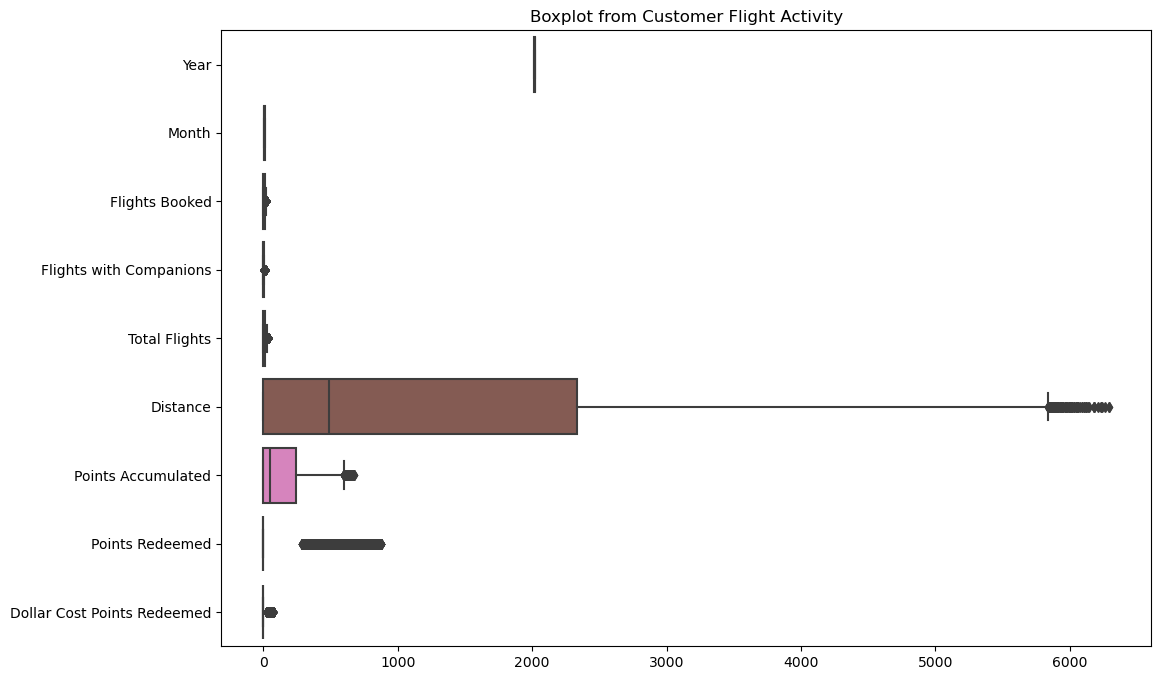

In [28]:
# I make a boxplot to better visualize for outliers.

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_flight.select_dtypes(include=['float64', 'int64']), orient='h')
plt.title('Boxplot from Customer Flight Activity')
plt.show()

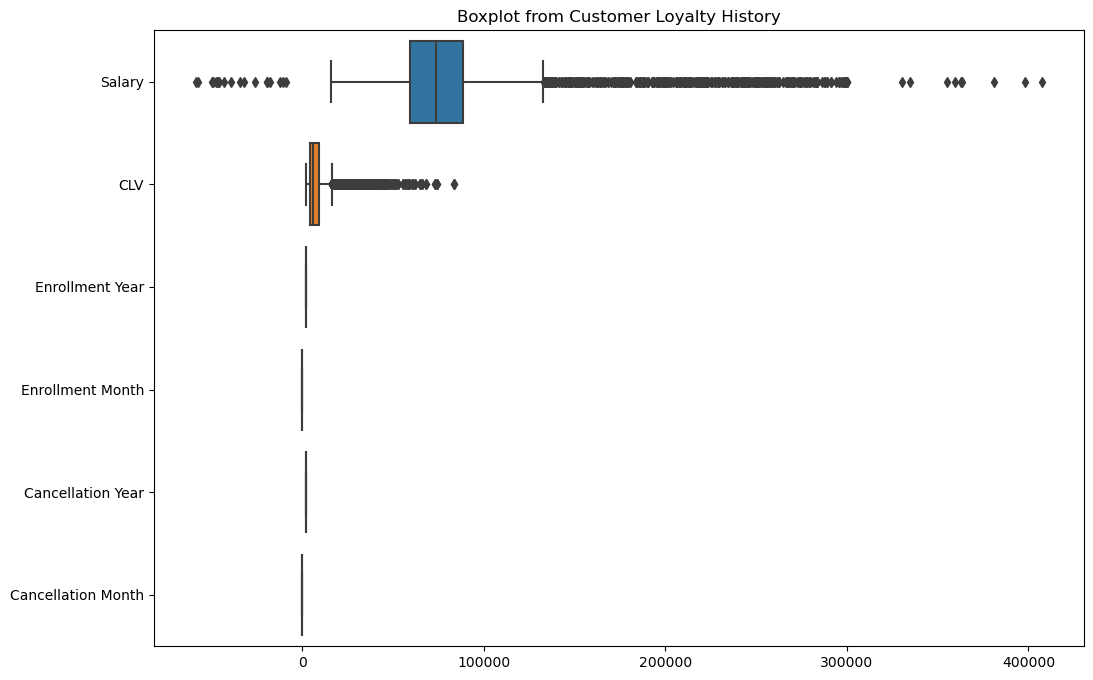

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_loyalty.select_dtypes(include=['float64', 'int64']), orient='h')
plt.title('Boxplot from Customer Loyalty History')
plt.show()

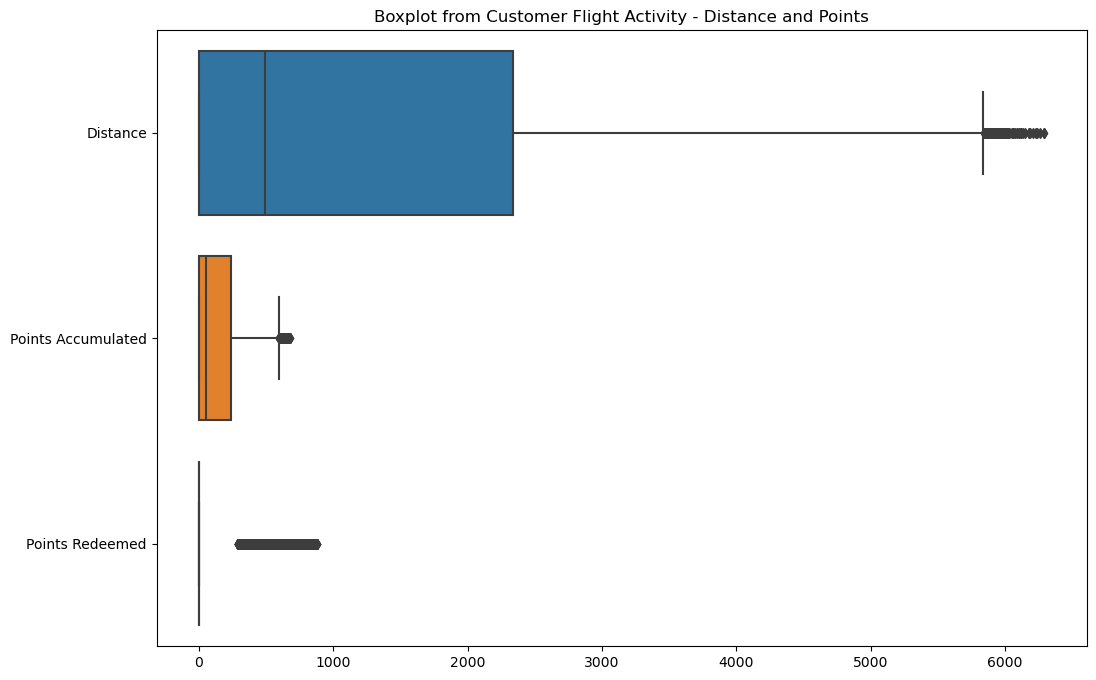

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_flight[['Distance', 'Points Accumulated', 'Points Redeemed']], orient='h')
plt.title('Boxplot from Customer Flight Activity - Distance and Points')
plt.show()

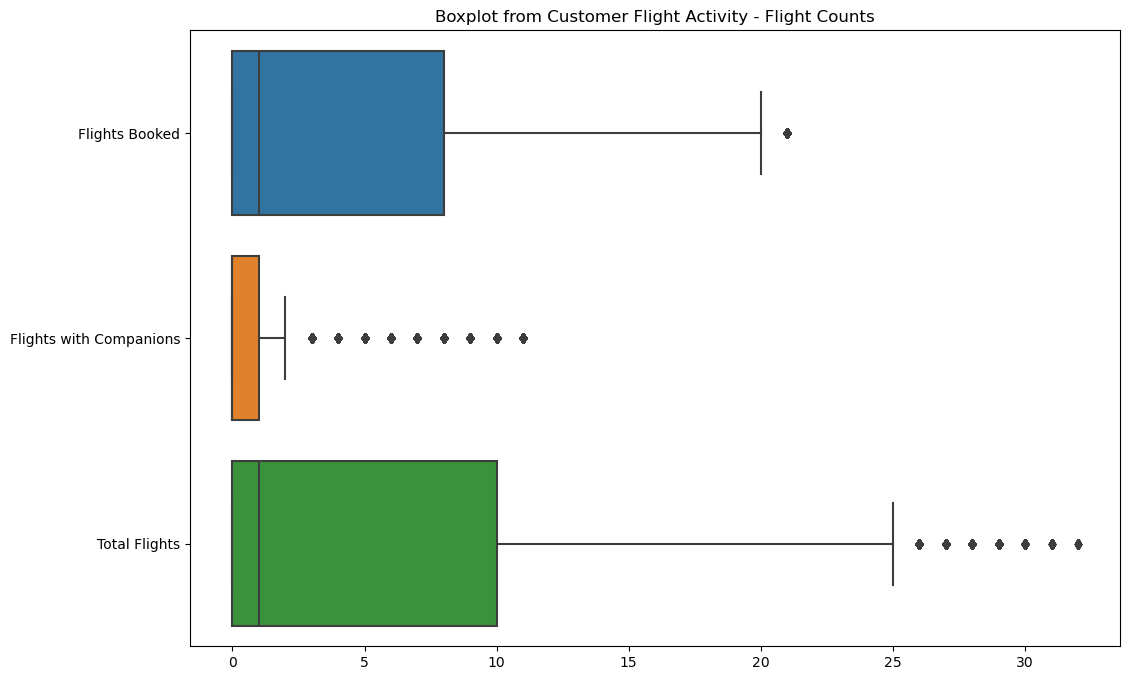

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_flight[['Flights Booked', 'Flights with Companions', 'Total Flights']], orient='h')
plt.title('Boxplot from Customer Flight Activity - Flight Counts')
plt.show()

In [31]:
# I restore the initial index to be able to use the Loyalty Number column as the index of the new joined dataframe.

df_flight_reset = df_flight.reset_index()
df_loyalty_reset = df_loyalty.reset_index()

merged = pd.merge(df_flight_reset, df_loyalty_reset, on='Loyalty Number', how='inner')
df_merged = merged.set_index('Loyalty Number')

df_merged.sample(5)

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
123115,2018,5,15,2,17,4284,428.0,471,38,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,78830.0,Married,Star,8646.50,Standard,2012,8,NaN,NaN
265784,2017,7,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,College,NaN,Married,Aurora,15144.41,Standard,2015,7,2016.0,3.0
286989,2018,11,3,1,4,1940,194.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Female,High School or Below,41779.0,Married,Nova,5507.24,Standard,2014,11,NaN,NaN
521545,2017,12,11,0,11,2915,291.0,0,0,Canada,Saskatchewan,Regina,S6J 3G0,Female,Bachelor,48381.0,Married,Nova,9470.62,Standard,2014,8,NaN,NaN
192554,2017,2,0,0,0,0,0.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,College,NaN,Married,Star,7223.69,Standard,2012,5,NaN,NaN


In [34]:
# Save the .csv of both dataframes together.

df_merged.to_csv('../data/merged_customer_data.csv')
print("The merged CSV file has been saved as 'merged_customer_data.csv'")

The merged CSV file has been saved as 'merged_customer_data.csv'


## Conclusions

Customer Flight Activity Observations:

- No null values.
- There are no categorical columns.
- 9 int columns
- 1 float column

Customer Loyalty History Remarks:

- 9 columns object
- 4 float columns
- 2 int columns
- Numeric: `Salary`, `CLV`, `Enrollment Year`, `Enrollment Month`, `Cancellation Year` and `Cancellation Month`.
- `Salary` has null values and a negative values.
- `Cancellation` Year and Cancellation Month have many null values.
- `Country` has only one value ("Canada").

Null

- `Salary` has 4238 nulls
- `Cancellation Year` has 14670 nulls
- `Cancellation Month` has 14670 nulls

Outliers

- `Salary` has negative
- There are at least 6 columns with high outliers that influence the mean. Continue to explore.

Data Consistency

- There are no typos or oddities in the categorical values except for the year and month columns that must have the value type for dates..
- Columns are well named, but could be lowercase and with a low slash in the spaces to facilitate future processing.

Data cleansing

- Edit negative value of `Salary`
- Impute or remove nulls from `Salary`
- We will not remove the year and month of cancellation columns as it may mean that they are still subscribed.
- Some duplicates are of passengers even if they do not travel, we will remove them.
- Remove the `Country` column since it has only a single value and is not relevant in the analysis.
- Taking into account the questions to be solved in this future analysis, we are interested that the `year` and `month` columns that are numeric in the dataframe form a backup date in datetime format, so we will delete these two columns after creating a new one.
- I do not see that we need the `Enrollment Year`, `Enrollment Month`, `Cancellation Year` and `Cancellation Month` columns later on to change their type so I leave them as they are.

Other remarks 

These are data for national flights in Canada.
